**Part 1: Understanding the data**


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metrics
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,recall_score,precision_score,classification_report,ConfusionMatrixDisplay,adjusted_rand_score,rand_score,v_measure_score
import sklearn.model_selection as ms
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense,Dropout
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


In [2]:
## Load cirrhosis-prediction-dataset##
#cirrhosis=pd.read_csv("File Path") ## Copy the file location in Jupyter
cirrhosis=pd.read_csv("/kaggle/input/cirrhosis-prediction-dataset/cirrhosis.csv")
## To check number of columns, data type & Null Values ##
cirrhosis.info()
## Following Columns has NaN values ##
## Drug,Ascites,Hepatomegaly,Spiders,Cholesterol,Copper,alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage ##        


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [3]:
cirrhosis.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [4]:
# View count of incomplete cases #
incomplete_cases=cirrhosis[cirrhosis.isna().any(axis=1)].shape[0]
print(incomplete_cases)


142


In [5]:
# View count of complete cases without NaN Values #
complete_cases = cirrhosis.dropna().shape[0]
print(complete_cases)

276


In [6]:
## View the dimensions of dataset #
cirrhosis.shape

(418, 20)

In [7]:
#check for duplicates
duplicates=cirrhosis.duplicated()
duplicates.value_counts()

False    418
dtype: int64

In [8]:
## View the first 5 obserations##
cirrhosis.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [9]:
#View the last five records##
cirrhosis.tail()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,418,976,C,NaN,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


In [10]:
# Number of Classes in Target Variable #
Target_Classfication= cirrhosis["Stage"].unique()
print(Target_Classfication)

[ 4.  3.  2.  1. nan]


In [11]:
# Valuecount for each target classification###
Target_Classfication_count= cirrhosis["Stage"].value_counts()
print(Target_Classfication_count)
nan_count = cirrhosis["Stage"].isna().sum()
print('Count of NaN:', nan_count)
# Data Distribution is not Balanced ##

3.0    155
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64
Count of NaN: 6


In [12]:
# Statistical distribution#
cirrhosis.describe(include=['object'])
#number of female observations are more#

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
count,418,312,418,312,312,312,418
unique,3,2,2,2,2,2,3
top,C,D-penicillamine,F,N,Y,N,N
freq,232,158,374,288,160,222,354


In [13]:
cirrhosis.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


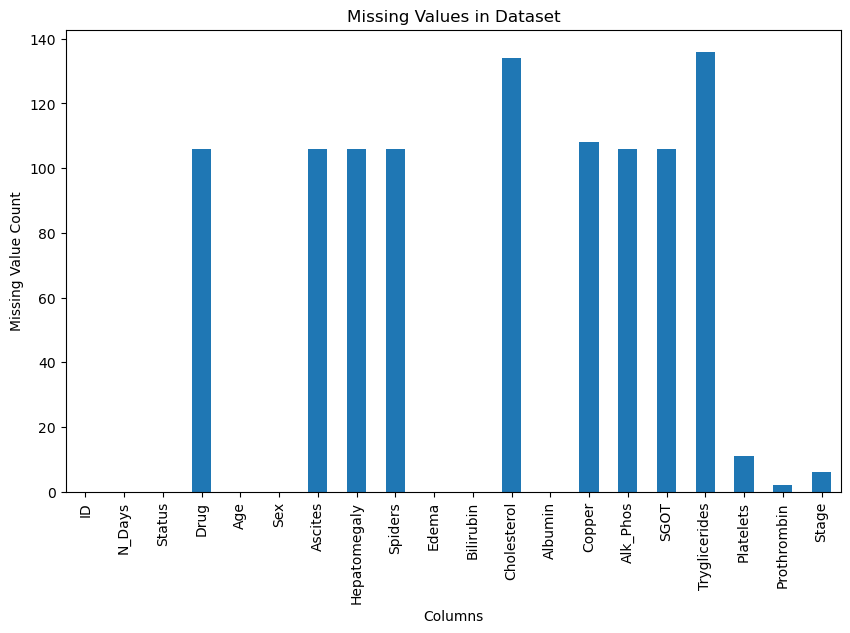

In [14]:
# visualize missing values
missing_values = cirrhosis.isna().sum()
plt.figure(figsize=(10, 6))  
missing_values.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Value Count')
plt.title('Missing Values in Dataset')
plt.show()

<Axes: xlabel='Stage', ylabel='count'>

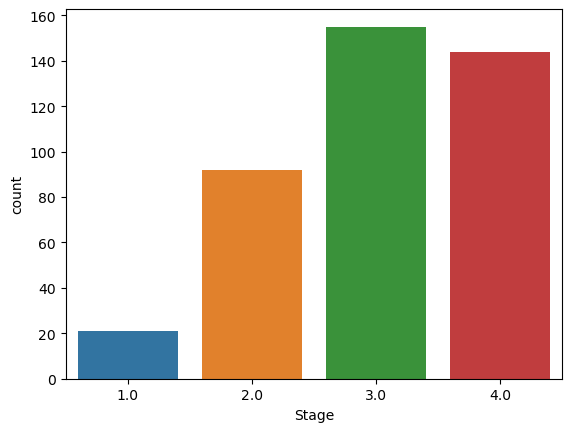

In [15]:
# Distribution of Target#
sns.countplot(x='Stage',data=cirrhosis)

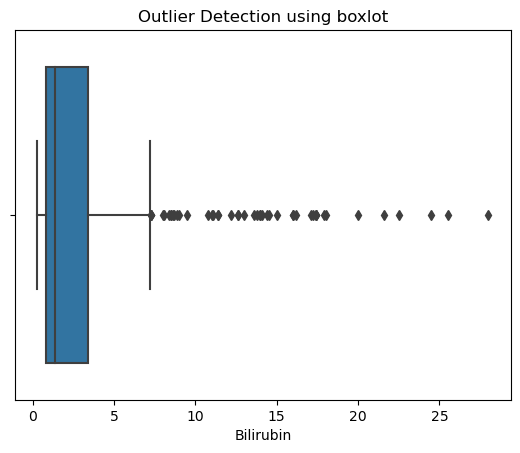

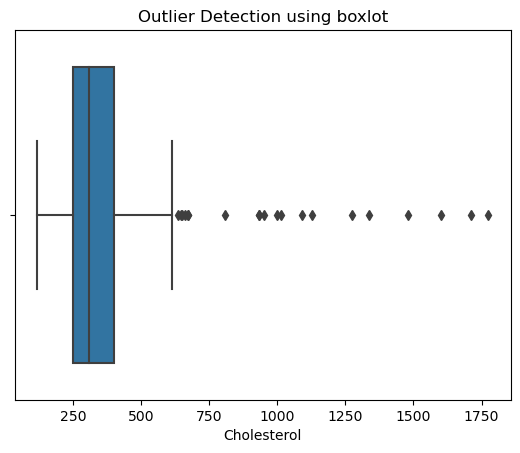

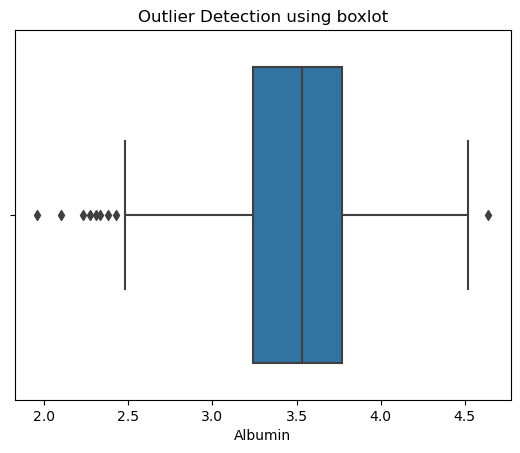

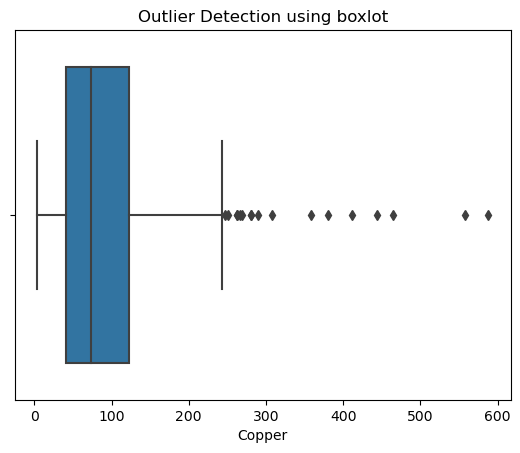

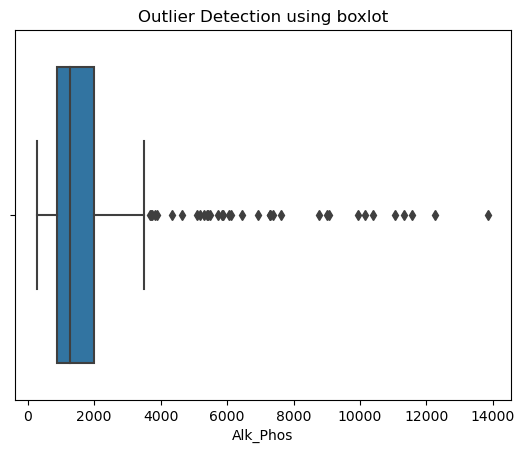

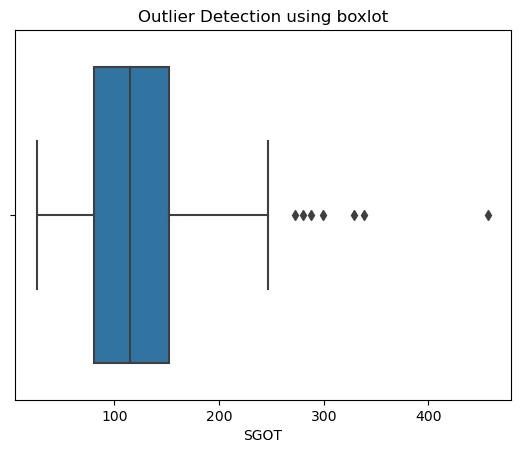

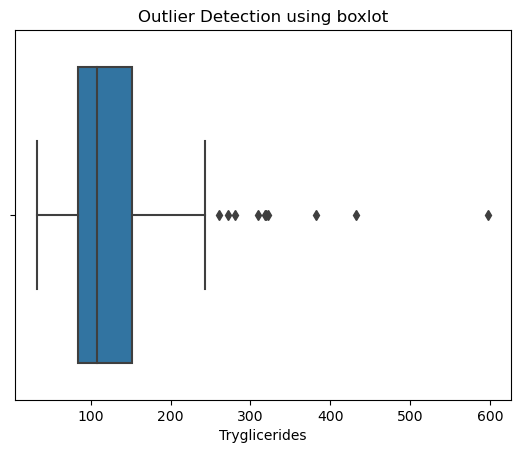

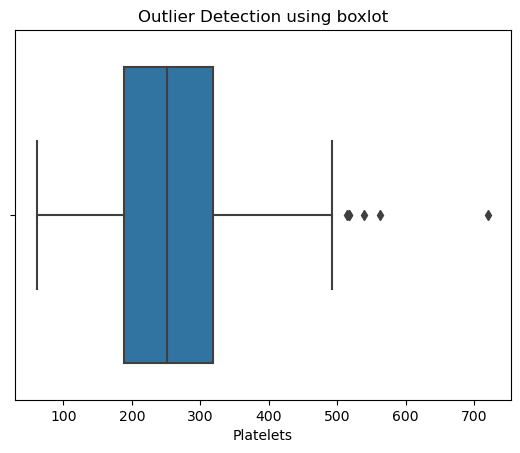

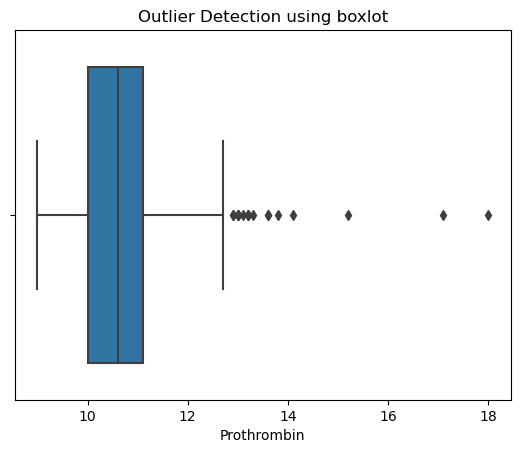

In [16]:
#Outlier Detetion using Boxplots#
numerical_features=['Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']

for column in cirrhosis[numerical_features]:   
        sns.boxplot(x=cirrhosis[column])  
        plt.title('Outlier Detection using boxlot')
        plt.show()


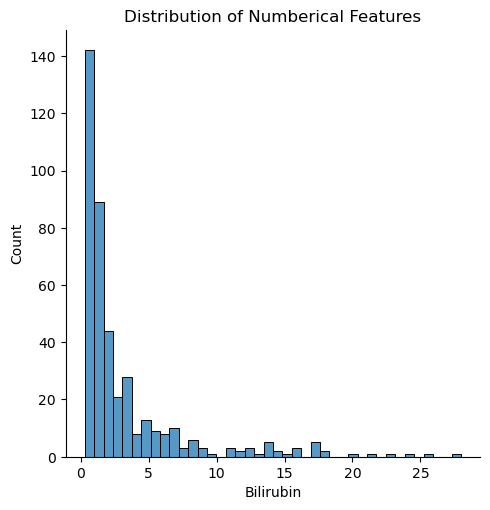

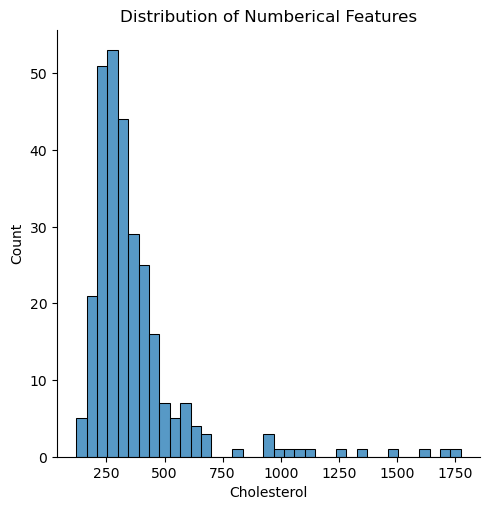

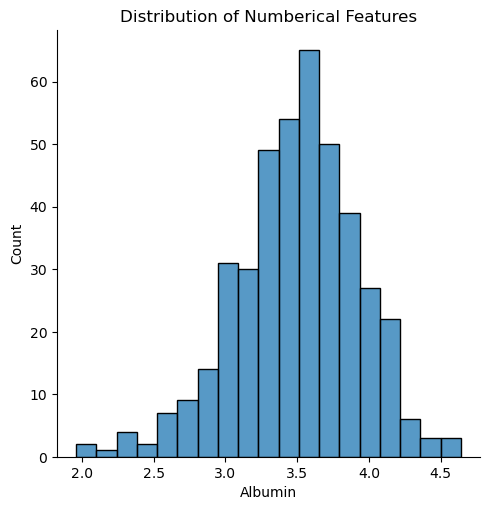

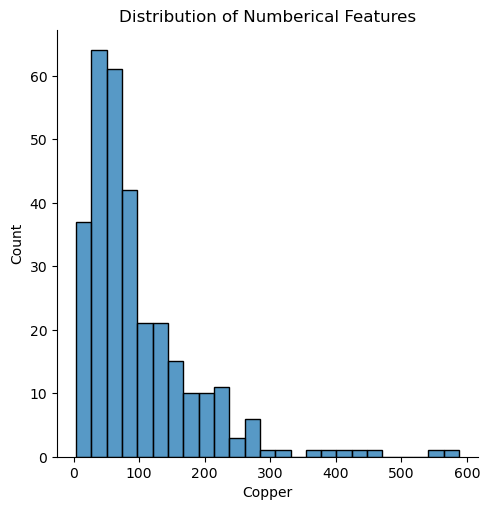

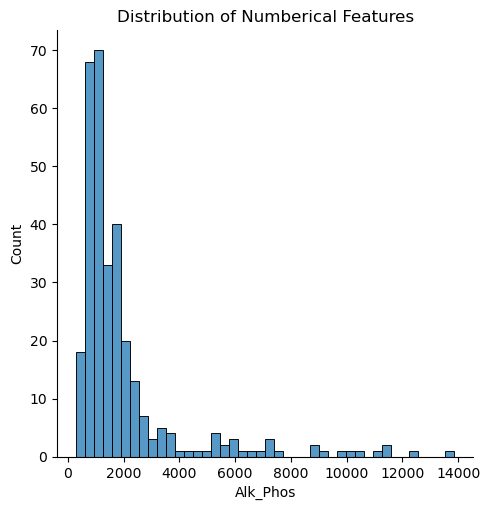

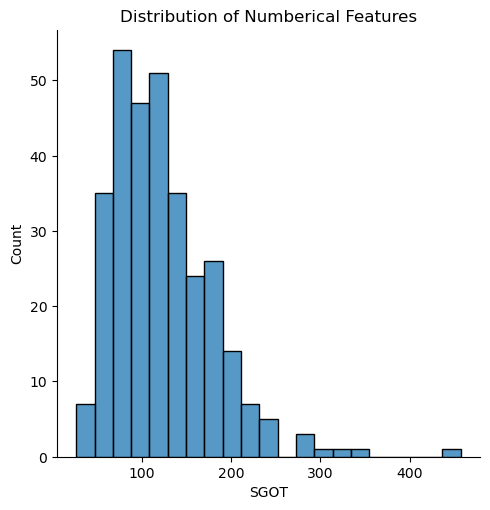

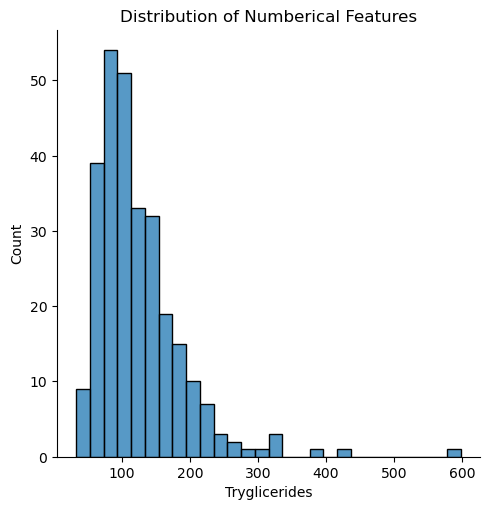

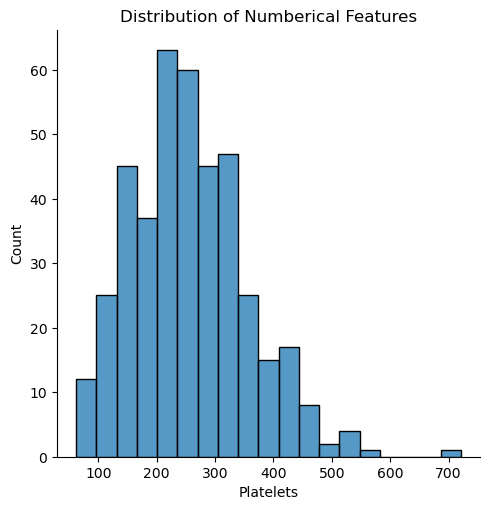

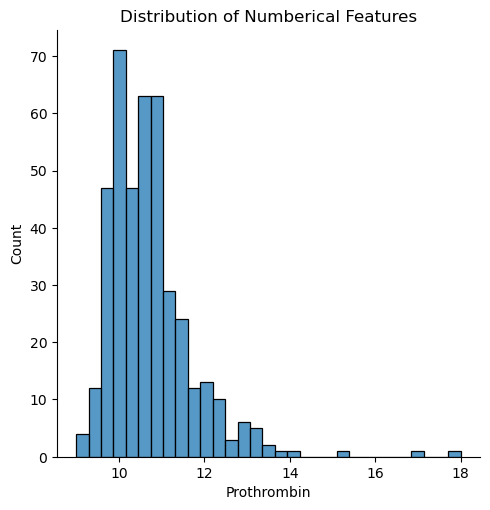

In [17]:
# Create forloop to visualize distribution of all features#
numerical_features=['Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']

for column in cirrhosis[numerical_features]:
    sns.displot(x=cirrhosis[column])
    plt.title('Distribution of Numberical Features')
    plt.show()

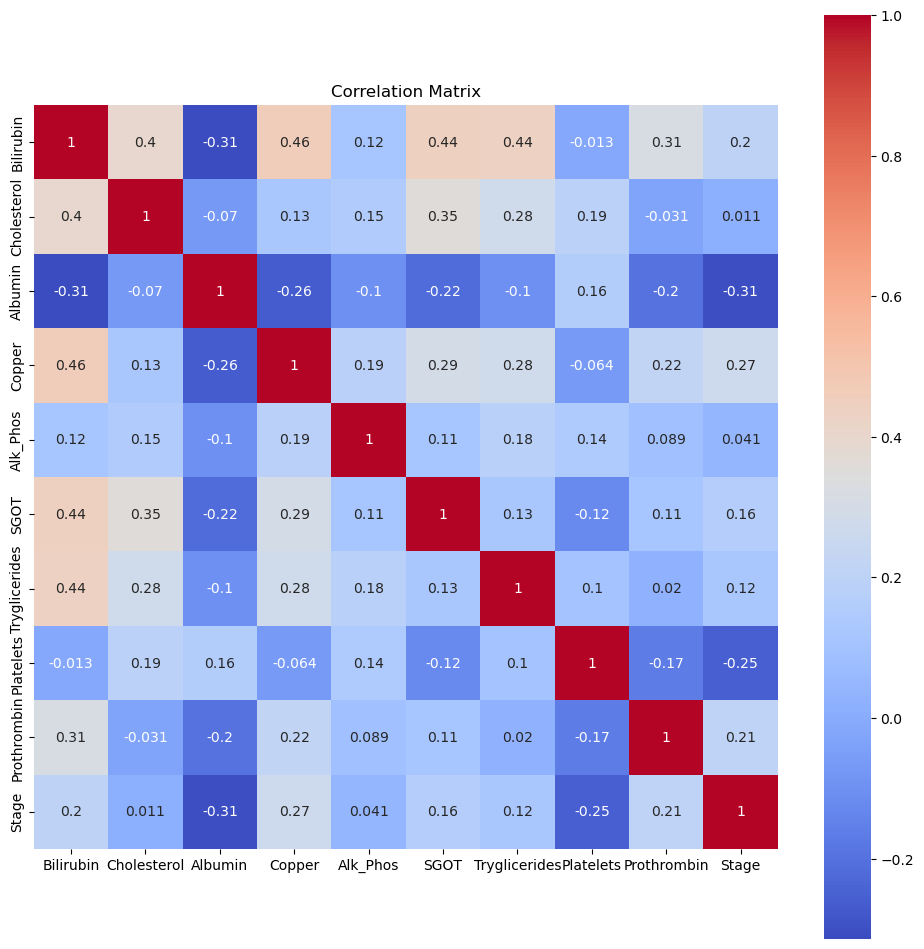

In [18]:
# Plot the correlation matrix
correlation_features=['Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin','Stage']
correlation=cirrhosis[correlation_features].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Cleaning step 1#
# Drop unnecessary features #
cirrhosis.drop(['ID','N_Days'],axis=1, inplace=True)


In [20]:

#  remove rows with missing values #
cirrhosis_withoutnull= cirrhosis.dropna()
cirrhosis_withoutnull.shape
print(cirrhosis_withoutnull)

    Status             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0        D  D-penicillamine  21464   F       Y            Y       Y     Y   
1        C  D-penicillamine  20617   F       N            Y       Y     N   
2        D  D-penicillamine  25594   M       N            N       N     S   
3        D  D-penicillamine  19994   F       N            Y       Y     S   
4       CL          Placebo  13918   F       N            Y       Y     N   
..     ...              ...    ...  ..     ...          ...     ...   ...   
307      C  D-penicillamine  22347   F       N            Y       N     N   
308      C          Placebo  21294   F       N            N       N     N   
309      C  D-penicillamine  22767   F       N            N       N     N   
310      C  D-penicillamine  13879   F       N            N       N     N   
311      C          Placebo  12109   F       N            N       Y     N   

     Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerid

In [21]:
#Data Transformation stage#
cirrhosis_withoutnull['Age']=cirrhosis_withoutnull['Age'] // 365
cirrhosis_withoutnull['Stage']=cirrhosis_withoutnull['Stage'].astype(int)
print(cirrhosis_withoutnull)

    Status             Drug  Age Sex Ascites Hepatomegaly Spiders Edema  \
0        D  D-penicillamine   58   F       Y            Y       Y     Y   
1        C  D-penicillamine   56   F       N            Y       Y     N   
2        D  D-penicillamine   70   M       N            N       N     S   
3        D  D-penicillamine   54   F       N            Y       Y     S   
4       CL          Placebo   38   F       N            Y       Y     N   
..     ...              ...  ...  ..     ...          ...     ...   ...   
307      C  D-penicillamine   61   F       N            Y       N     N   
308      C          Placebo   58   F       N            N       N     N   
309      C  D-penicillamine   62   F       N            N       N     N   
310      C  D-penicillamine   38   F       N            N       N     N   
311      C          Placebo   33   F       N            N       Y     N   

     Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0         14.5    

In [22]:
#Column encoding for categorical variable #

features_to_replace=['Ascites','Hepatomegaly','Spiders']
mapping={'Y':0, 'N':1}
#Replace categorical values##

cirrhosis_withoutnull['Status']=cirrhosis_withoutnull['Status'].replace({'C': 0,'CL':1,'D':2})
cirrhosis_withoutnull['Drug']=cirrhosis_withoutnull['Drug'].replace({'D-penicillamine':0, 'Placebo':1})
cirrhosis_withoutnull['Sex']=cirrhosis_withoutnull['Sex'].replace({'F':0, 'M':1})
cirrhosis_withoutnull['Edema']=cirrhosis_withoutnull['Edema'].replace({'Y':0, 'N':1,'S':2})
cirrhosis_withoutnull['Stage']=cirrhosis_withoutnull['Stage'].replace({1:0, 2: 1, 3: 2, 4:3})

### Multiple features with yes or no values##
for column in features_to_replace:
    cirrhosis_withoutnull[column]=cirrhosis_withoutnull[column].replace(mapping)
    print(cirrhosis_withoutnull)

     Status  Drug  Age  Sex  Ascites Hepatomegaly Spiders  Edema  Bilirubin  \
0         2     0   58    0        0            Y       Y      0       14.5   
1         0     0   56    0        1            Y       Y      1        1.1   
2         2     0   70    1        1            N       N      2        1.4   
3         2     0   54    0        1            Y       Y      2        1.8   
4         1     1   38    0        1            Y       Y      1        3.4   
..      ...   ...  ...  ...      ...          ...     ...    ...        ...   
307       0     0   61    0        1            Y       N      1        0.4   
308       0     1   58    0        1            N       N      1        0.4   
309       0     0   62    0        1            N       N      1        1.7   
310       0     0   38    0        1            N       N      1        2.0   
311       0     1   33    0        1            N       Y      1        6.4   

     Cholesterol  Albumin  Copper  Alk_Phos    SGOT

In [23]:
#outlier detection using Isolation Forest#
numerical_features=cirrhosis_withoutnull[['Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']]

#outlier detection#
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=float(0.1),random_state=42)
model.fit(numerical_features)
outlier_scores = model.decision_function(numerical_features)
#Obtain the outlier predictions (-1 for outliers, 1 for inliers) for the numerical features
outlier_predictions=model.predict(numerical_features)
value_counts = pd.Series(outlier_predictions).value_counts()
print(value_counts)


 1    248
-1     28
dtype: int64


In [24]:
#Outlier detection using z-scores
# Select the columns for outlier detection
columns = cirrhosis_withoutnull[['Age', 'Cholesterol','Albumin', 'Copper','Bilirubin','Alk_Phos','SGOT','Platelets','Tryglicerides', 'Ascites', 'Prothrombin']]

# calculating  z-scores for each column
z_scores = np.abs((columns - columns.mean()) / columns.std())

threshold = 3

outlier_indices = np.where(z_scores > threshold)

# Create a mask to mark the outliers in the DataFrame
outlier_mask = np.zeros_like(columns, dtype=bool)
outlier_mask[outlier_indices] = True

# print the number of outliers in each column
num_outliers = np.sum(outlier_mask, axis=0)
for col, num in zip(columns, num_outliers):
    print(f"Number of outliers in {col}: {num}")

Number of outliers in Age: 0
Number of outliers in Cholesterol: 8
Number of outliers in Albumin: 2
Number of outliers in Copper: 6
Number of outliers in Bilirubin: 10
Number of outliers in Alk_Phos: 9
Number of outliers in SGOT: 3
Number of outliers in Platelets: 1
Number of outliers in Tryglicerides: 4
Number of outliers in Ascites: 19
Number of outliers in Prothrombin: 3


In [25]:
# Separate features (X) and target variable (y)
unsampledX = cirrhosis_withoutnull.drop('Stage', axis=1)
unsampledY = cirrhosis_withoutnull['Stage']

#resampling technique 3#

resample=RandomOverSampler(random_state=42)
sampledX, sampledY = resample.fit_resample(unsampledX,unsampledY)
sampledX1, sampledY1 = resample.fit_resample(unsampledX,unsampledY)
print('Unsampled Value count: \n',unsampledY.value_counts())
print('sampled Value count: \n', sampledY.value_counts())
print(sampledY.unique())    

Unsampled Value count: 
 2    111
3     94
1     59
0     12
Name: Stage, dtype: int64
sampled Value count: 
 3    111
2    111
1    111
0    111
Name: Stage, dtype: int64
[3 2 1 0]


In [26]:
#feature scaling#
scaler= StandardScaler()
numerical_columns=['Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
sampledX[numerical_columns]=scaler.fit_transform(sampledX[numerical_columns])
sampledX[numerical_columns].describe()

,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02,444.000000,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02
mean,6.401286e-17,-1.280257e-16,1.520305e-16,1.600321e-17,0.000000,6.401286e-17,6.401286e-17,-2.200442e-17,-1.604322e-15
std,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00,1.001128,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00
min,-5.873941e-01,-1.087536e+00,-4.205126e+00,-1.071535e+00,-0.780693,-1.552232e+00,-1.407724e+00,-2.303330e+00,-1.411161e+00
25%,-4.901612e-01,-5.331421e-01,-5.017046e-01,-6.595423e-01,-0.564154,-7.582472e-01,-6.124350e-01,-6.033418e-01,-6.307956e-01
50%,-3.929283e-01,-3.032715e-01,1.023996e-01,-2.475495e-01,-0.358165,-2.335502e-01,-2.570931e-01,-4.890570e-04,-1.625762e-01
75%,9.323629e-02,2.289957e-01,7.130701e-01,2.674416e-01,0.035224,5.320716e-01,4.535907e-01,5.537926e-01,2.276067e-01
max,6.145985e+00,7.050129e+00,2.203631e+00,6.447334e+00,6.038750,6.437359e+00,8.152665e+00,3.422343e+00,4.909801e+00


In [27]:
#Feature selection using recrusive elimination technique#
selectedfeature=RFE(RandomForestClassifier(n_estimators=100,random_state=42),n_features_to_select=6)
selectedfeature.fit(sampledX, sampledY)
reducedsampledX=selectedfeature.transform(sampledX)
feature_mask = selectedfeature.support_
selected_feature_names = sampledX.columns[feature_mask]
print(selected_feature_names)
print(reducedsampledX.shape)
print(sampledX.shape)
print(reducedsampledX)
print(sampledY)


Index(['Bilirubin', 'Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Platelets'], dtype='object')
(444, 6)
(444, 17)
[[ 2.8643742  -0.39423632  0.88543078 -0.0627461   0.48899113 -0.84048298]
 [-0.39292826 -0.19263858 -0.42779631  2.78934835  0.03387488 -0.48619983]
 [-0.32000358 -0.81218285  1.58066864 -0.66664575 -0.29064927 -1.28619404]
 ...
 [ 0.21477742 -0.39915334  1.09142718  2.73016417  0.17806644 -1.59476324]
 [ 0.0203116  -0.48765966 -0.1703008  -0.61740933  0.46011556 -1.6290487 ]
 [ 2.84006598  0.52524606 -0.68529181 -0.31395227 -0.95478739  1.38807233]]
0      3
1      2
2      3
3      3
4      2
      ..
439    3
440    3
441    3
442    3
443    3
Name: Stage, Length: 444, dtype: int64


In [28]:
#train test split including all features#
x_train, x_test,y_train,y_test=train_test_split(sampledX,sampledY,test_size=0.2,random_state=2,stratify=sampledY)
print('Dimension of training data with all features:',x_train.shape,'Dimension of test data with all features:', x_test.shape)

#train test split from selected features#
x_train_reducedfeature,x_test_reducedfeature,y_train_reducedfeature,y_test_reducedfeature=train_test_split(reducedsampledX,sampledY,test_size=0.2,random_state=2,stratify=sampledY)
print('Dimension of training data with selective features:',x_train_reducedfeature.shape,'Dimension of testing data with selective features:',x_test_reducedfeature.shape)

#train test split with unscaled data#
x_train_unscaled, x_test_unscaled,y_train_unscaled,y_test_unscaled=train_test_split(sampledX1,sampledY1,test_size=0.2,random_state=2,stratify=sampledY1)

#train test split with unsampled data#
x_train_unsampled, x_test_unsampled,y_train_unsampled,y_test_unsampled=train_test_split(unsampledX,unsampledY,test_size=0.2,random_state=2,stratify=unsampledY)

print('training data value count: \n',y_train_reducedfeature.value_counts())
print('test data vaue count: \n',y_test_reducedfeature.value_counts())

Dimension of training data with all features: (355, 17) Dimension of test data with all features: (89, 17)
Dimension of training data with selective features: (355, 6) Dimension of testing data with selective features: (89, 6)
training data value count: 
 3    89
1    89
2    89
0    88
Name: Stage, dtype: int64
test data vaue count: 
 0    23
1    22
3    22
2    22
Name: Stage, dtype: int64


RFC_accuracy with complete feature set default decisiontrees: 70.78651685393258
RFC_accuracy for complete featureset after hyper parameter tuning: 74.15730337078652
RFC_accuracy for reduced featureset: 66.29213483146067


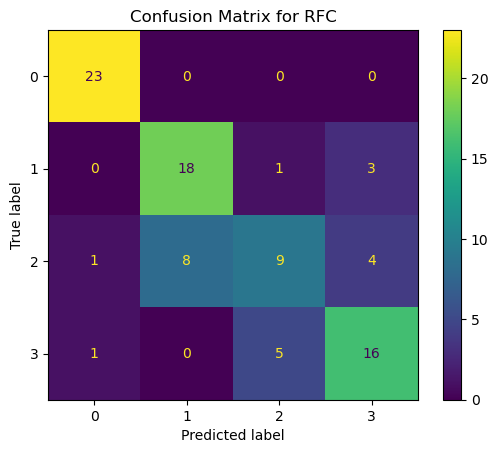

Classification report for complete featureset with default decision trees 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       0.64      0.82      0.72        22
           2       0.43      0.27      0.33        22
           3       0.70      0.73      0.71        22

    accuracy                           0.71        89
   macro avg       0.68      0.70      0.69        89
weighted avg       0.68      0.71      0.69        89

Classification report for complete featureset after hyper parameter tuning 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       0.69      0.82      0.75        22
           2       0.60      0.41      0.49        22
           3       0.70      0.73      0.71        22

    accuracy                           0.74        89
   macro avg       0.73      0.74      0.73        89
weighted avg       0.73      0.7

In [29]:
##Implementation Task 1##

##Initiate the Model
#RFC = RandomForestClassifier(n_estimators=100,random_state=42,criterion="log_loss")
#RFC1 = RandomForestClassifier(n_estimators=100,random_state=42,criterion="log_loss")
##Initiate the Model
RFC_Default=RandomForestClassifier(random_state=42)
RFC = RandomForestClassifier(n_estimators=10,random_state=20,criterion="log_loss")
RFC_reducedfeature = RandomForestClassifier(n_estimators=10,random_state=20,criterion="log_loss")

#model Training#
RFC_Default.fit(x_train,y_train)
RFC.fit(x_train,y_train)
RFC_reducedfeature.fit(x_train_reducedfeature,y_train_reducedfeature)


#Model Prediction#
RFC_DefaultPrediction=RFC_Default.predict(x_test)
#print(RFC_DefaultPrediction)

RFCprediction=RFC.predict(x_test)
#print(RFC.predict(x_test))

RFCprediction_reducedfeature=RFC_reducedfeature.predict(x_test_reducedfeature)
#print(RFC_reducedfeature.predict(x_test_reducedfeature))

###Metrics#####

RFC_accuracy=(metrics.accuracy_score(y_test,RFCprediction))*100
confusion_matrix=metrics.confusion_matrix(y_test,RFCprediction)

RFC_accuracy_reducedfeature=(metrics.accuracy_score(y_test_reducedfeature,RFCprediction_reducedfeature))*100


RFC_accuracy_default=(metrics.accuracy_score(y_test,RFC_DefaultPrediction))*100
confusion_matrix1=metrics.confusion_matrix(y_test,RFC_DefaultPrediction)


print('RFC_accuracy with complete feature set default decisiontrees:',RFC_accuracy_default)
print('RFC_accuracy for complete featureset after hyper parameter tuning:',RFC_accuracy)
print('RFC_accuracy for reduced featureset:',RFC_accuracy_reducedfeature)


display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
display.plot()
plt.title('Confusion Matrix for RFC')
plt.show()

#print('Confusion Matrix_complete Featureset: \n',confusion_matrix)

print("Classification report for complete featureset with default decision trees \n",classification_report(y_test,RFC_DefaultPrediction))
print("Classification report for complete featureset after hyper parameter tuning \n",classification_report(y_test,RFCprediction))
print("Classification report for reduced featureset \n",classification_report(y_test_reducedfeature,RFCprediction_reducedfeature))


#cross validation
RFC_results = ms.cross_val_score(RFC_Default, x_train, y_train, cv=10)
RFC_results_reducedfeature = ms.cross_val_score(RFC_reducedfeature, x_train_reducedfeature, y_train_reducedfeature, cv=10)
RFC_results_hypertuned = ms.cross_val_score(RFC, x_train, y_train, cv=10)

print ("Model Score complete feature with default decisiontrees", RFC_results.mean())
print ("Model Score complete feature after hyper parameter tuning", RFC_results.mean())
print ("Model Score reduced feature=", RFC_results_reducedfeature.mean())


In [ ]:
#hyper parameter tuning for RFC using Grid Search CV#
model=RandomForestClassifier()
parameters = {
    
'n_estimators':[10,100,500],
'random_state':[ 10,25,42, 52],
'criterion':['gini', 'entropy', 'log_loss']
    }

classifier=GridSearchCV(model,parameters,cv=5)
classifier.fit(sampledX,sampledY)
results=pd.DataFrame(classifier.cv_results_)
print(results)
#best_param = classifier.best_params_
#print(best_param)
#high_accuracy=classifier.best_score_
#print(high_accuracy)


Weight matrix 0 shape: (6, 20)
Weight matrix 1 shape: (20, 15)
Weight matrix 2 shape: (15, 10)
Weight matrix 3 shape: (10, 4)
Accuracy of Logistic activation with 17 features: 61.79775280898876
Accuracy of Logistic activation with 6 features: 69.66292134831461
Model Score for Logistic activation _reducedfeature 0.5996031746031746
Model Score for complete feature 0.5721428571428572
Classification report for reduced featureset 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        23
           1       0.75      0.68      0.71        22
           2       0.59      0.45      0.51        22
           3       0.54      0.64      0.58        22

    accuracy                           0.70        89
   macro avg       0.69      0.69      0.69        89
weighted avg       0.69      0.70      0.69        89



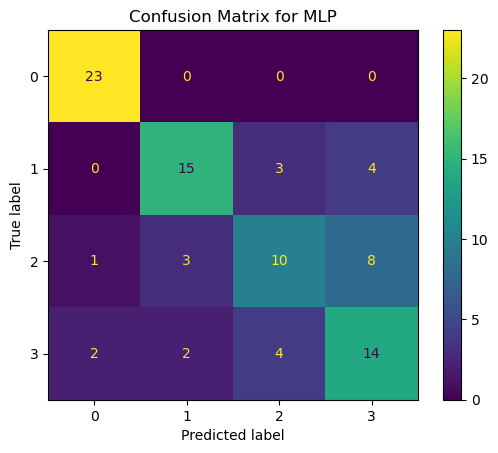

In [30]:
##Implementation Task 2##


##Logistic Activation#
MLPmodel1=MLPClassifier(activation='logistic',max_iter=100,
                                              hidden_layer_sizes=(20,15,10),
                                              solver='lbfgs',learning_rate='adaptive',random_state=42)

MLPmodel_reducedfeature=MLPClassifier(activation='logistic',max_iter=100,
                                              hidden_layer_sizes=(20,15,10),
                                              solver='lbfgs',learning_rate='adaptive',random_state=42)
#training model#
MLPmodel1.fit(x_train,y_train)
MLPmodel_reducedfeature.fit(x_train_reducedfeature,y_train_reducedfeature)


#prediction#
MLPprediction1=MLPmodel1.predict(x_test)
#print(MLPmodel1.predict(x_test))

MLPprediction_reducedfeature=MLPmodel_reducedfeature.predict(x_test_reducedfeature)
#print(MLPprediction_hypertuning.predict(x_test_reducedfeature))

#weight matrix for logistic activation with 3 hidden layers#
coefficients=MLPmodel_reducedfeature.coefs_

for i in range(len(coefficients)):
    print("Weight matrix", i, "shape:", coefficients[i].shape)

#metrics#

MLPaccuracy=(metrics.accuracy_score(y_test,MLPprediction1))*100
print('Accuracy of Logistic activation with 17 features:',MLPaccuracy)

MLPaccuracy_reducedfeature=(metrics.accuracy_score(y_test_reducedfeature,MLPprediction_reducedfeature))*100
print('Accuracy of Logistic activation with 6 features:',MLPaccuracy_reducedfeature)


#cross validation
MLP_Results1_reducedfeature = ms.cross_val_score(MLPmodel_reducedfeature, x_train_reducedfeature, y_train_reducedfeature, cv=10)
print ("Model Score for Logistic activation _reducedfeature", MLP_Results1_reducedfeature.mean())

MLP_Results1_completefeature = ms.cross_val_score(MLPmodel1, x_train, y_train, cv=10)
print ("Model Score for complete feature", MLP_Results1_completefeature.mean())

#print("Classification report for complete featureset \n",classification_report(y_test,MLPprediction1_reducedfeature))
print("Classification report for reduced featureset \n",classification_report(y_test_reducedfeature,MLPprediction_reducedfeature))

#MLP confusion matrix for reduced feature set#
confusion_matrix_MLP=metrics.confusion_matrix(y_test_reducedfeature,MLPprediction_reducedfeature)
MLP_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_MLP)
MLP_display.plot()
plt.title('Confusion Matrix for MLP')
plt.show()




In [31]:
##hyper parameter tuning##
MLPmodel2=MLPClassifier(activation='tanh',max_iter=100,
                                              hidden_layer_sizes=(100,50,25),learning_rate='constant',
                                              solver='lbfgs',random_state=42)
MLPmodel2.fit(x_train_reducedfeature,y_train_reducedfeature)

MLPprediction2=MLPmodel2.predict(x_test_reducedfeature)



##Activation as relu##
MLPmodel2_relu=MLPClassifier(activation='relu',max_iter=100,
                                           hidden_layer_sizes=(100,50,25),
                                           solver='lbfgs',learning_rate='adaptive',random_state=42)
MLPmodel2_relu.fit(x_train_reducedfeature,y_train_reducedfeature)
MLPprediction2_relu=MLPmodel2_relu.predict(x_test_reducedfeature)


MLPaccuracy_relu=(metrics.accuracy_score(y_test_reducedfeature,MLPprediction2_relu))*100
print('Accuracy with relu activation:',MLPaccuracy_relu)
MLPaccuracy2=(metrics.accuracy_score(y_test_reducedfeature,MLPprediction2))*100
print('Accuracy with tahn activation', MLPaccuracy2)
MLP_Results2 = ms.cross_val_score(MLPmodel2, x_train_reducedfeature, y_train_reducedfeature, cv=5)
print ("Model Score for tanh activation", MLP_Results2.mean())



Accuracy with relu activation: 73.03370786516854
Accuracy with tahn activation 73.03370786516854
Model Score for tanh activation 0.6563380281690141


In [ ]:
#RandomizedSearchCV hyperparameter turning for MLP#
model=MLPClassifier()
parameters = {
    
'activation':['identity', 'logistic', 'tanh', 'relu'],
'solver':['lbfgs', 'sgd', 'adam'],
'learning_rate':['constant', 'invscaling', 'adaptive'],
'max_iter':[100,200]
       
    }

classifier=RandomizedSearchCV(model,parameters,cv=5)
classifier.fit(reducedsampledX,sampledY)
classifier.cv_results_
results2=pd.DataFrame(classifier.cv_results_)
print(results2)
best_param2 = classifier.best_params_
#print(best_param2)
high_accuracy2=classifier.best_score_
#print(high_accuracy2)



In [32]:
# Task 3 Deep convolutional neural network#
#Reshape X-Features and encode Y target#
sampledX_array = sampledX.values
sampledX_reshaped = np.reshape(sampledX_array, (sampledX_array.shape[0], sampledX_array.shape[1], 1))
sampledY_encoded= to_categorical(sampledY,num_classes=4)

#train test spl
CNNxtrain,CNNxtest,CNNytrain,CNNytest= train_test_split(sampledX_reshaped,sampledY_encoded,test_size=0.2,random_state=3,stratify=sampledY_encoded )


Epoch 1/10
18/18 [==============================] - 1s 3ms/step - loss: 1.6369 - accuracy: 0.2761
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 1.3655 - accuracy: 0.3606
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 1.3154 - accuracy: 0.4056
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 1.2839 - accuracy: 0.4451
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 1.2675 - accuracy: 0.4394
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 1.2760 - accuracy: 0.4085
Epoch 7/10
18/18 [==============================] - 0s 2ms/step - loss: 1.2711 - accuracy: 0.4028
Epoch 8/10
18/18 [==============================] - 0s 3ms/step - loss: 1.1752 - accuracy: 0.4423
Epoch 9/10
18/18 [==============================] - 0s 3ms/step - loss: 1.0832 - accuracy: 0.5352
Epoch 10/10
3/3 [==============================] - 0s 2ms/step
Model: "sequential_2"
_________________________________

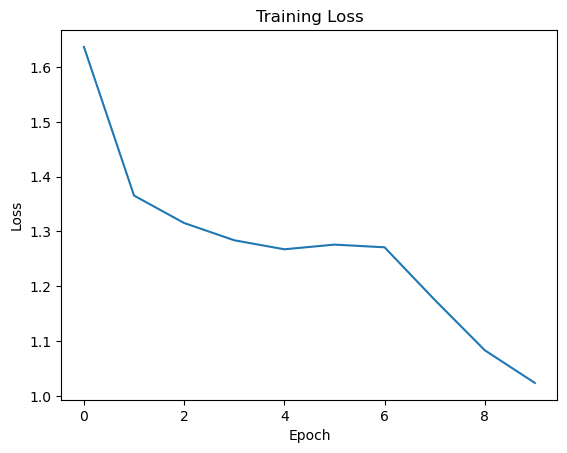

CNN Classification Report: 
               precision    recall  f1-score   support

           0       0.65      1.00      0.79        22
           1       0.58      0.30      0.40        23
           2       0.50      0.05      0.08        22
           3       0.49      0.91      0.63        22

    accuracy                           0.56        89
   macro avg       0.55      0.56      0.48        89
weighted avg       0.55      0.56      0.48        89



In [35]:

# Create the model
CNNmodel = tf.keras.Sequential([
    Conv1D(32, 3, activation='relu', padding='same', input_shape=(CNNxtrain.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu', padding='same'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

# Compile the model
CNNmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history= CNNmodel.fit(CNNxtrain, CNNytrain, epochs=10, batch_size=20,shuffle=False)

# Evaluate the model on the test data
loss, accuracy = CNNmodel.evaluate(CNNxtest, CNNytest)

#prediction'#
CNNprediction=CNNmodel.predict(CNNxtest)
CNNmodel.summary()

print('CNN Test accuracy:',accuracy)
print('Test loss CNN:', loss)

#CNN Loss Curve
loss= history.history['loss']
plt.plot(loss)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#classification report
ytruelabel=np.argmax(CNNytest, axis=1)
yprediction=np.argmax(CNNprediction, axis=1)
print('CNN Classification Report: \n',classification_report(ytruelabel,yprediction))

Epoch 1/30
18/18 [==============================] - 1s 3ms/step - loss: 1.7800 - accuracy: 0.2592
Epoch 2/30
18/18 [==============================] - 0s 3ms/step - loss: 1.5676 - accuracy: 0.2704
Epoch 3/30
18/18 [==============================] - 0s 3ms/step - loss: 1.4597 - accuracy: 0.2901
Epoch 4/30
18/18 [==============================] - 0s 3ms/step - loss: 1.3469 - accuracy: 0.3352
Epoch 5/30
18/18 [==============================] - 0s 3ms/step - loss: 1.3212 - accuracy: 0.3268
Epoch 6/30
18/18 [==============================] - 0s 3ms/step - loss: 1.2952 - accuracy: 0.3915
Epoch 7/30
18/18 [==============================] - 0s 3ms/step - loss: 1.2134 - accuracy: 0.4366
Epoch 8/30
18/18 [==============================] - 0s 3ms/step - loss: 1.1241 - accuracy: 0.4930
Epoch 9/30
18/18 [==============================] - 0s 3ms/step - loss: 1.1387 - accuracy: 0.4676
Epoch 10/30
18/18 [==============================] - 0s 3ms/step - loss: 1.0783 - accuracy: 0.5014
Epoch 11/30
18/18 [

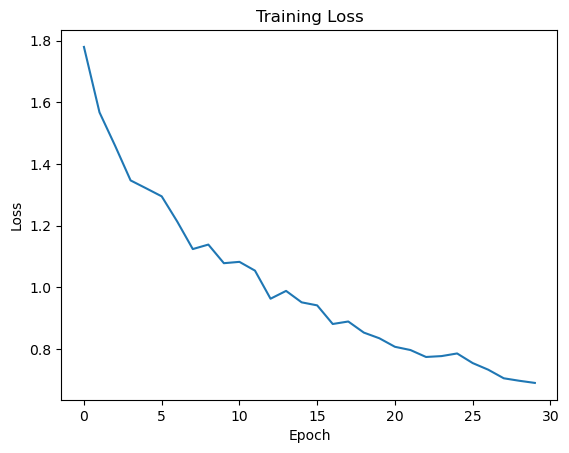

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.62      0.43      0.51        23
           2       0.41      0.41      0.41        22
           3       0.48      0.64      0.55        22

    accuracy                           0.62        89
   macro avg       0.63      0.62      0.62        89
weighted avg       0.63      0.62      0.62        89



In [36]:
### Add drop out layer to improve the accuracy####
# Create the model
CNNmodel = tf.keras.Sequential([
    Conv1D(32, 3, activation='relu', padding='same', input_shape=(CNNxtrain.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu', padding='same'),
    MaxPooling1D(2),  
    Flatten(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

# Compile the model
CNNmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history= CNNmodel.fit(CNNxtrain, CNNytrain, epochs=30, batch_size=20,shuffle=False)

# Evaluate the model on the test data
loss, accuracy = CNNmodel.evaluate(CNNxtest, CNNytest)

print('Test accuracy:',accuracy)
print('Test loss:', loss)

#prediction'#
CNNprediction=CNNmodel.predict(CNNxtest)
CNNmodel.summary()

#CNN Loss Curve
loss= history.history['loss']
plt.plot(loss)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#classification report
ytruelabel=np.argmax(CNNytest, axis=1)
yprediction=np.argmax(CNNprediction, axis=1)
print(classification_report(ytruelabel,yprediction))

acc2 24.54954954954955
Rand Index: 0.5803794765420047
adjusted_randscore_value: 0.0124871859608366
adj_mutualinfo_score: 0.014258659903721646


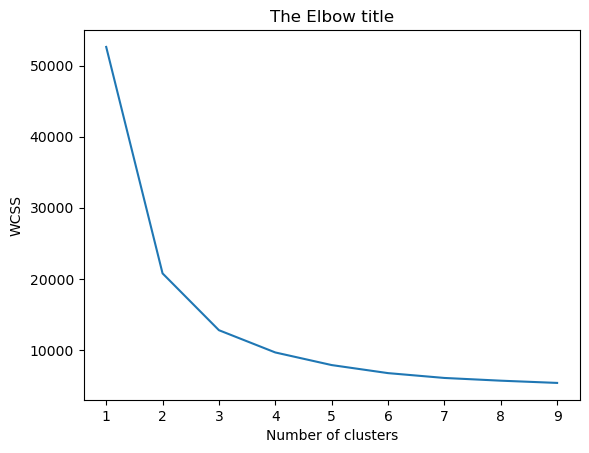

In [37]:
#Clustering using Kmeans#
## To predict optimum number of clusters
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(sampledX)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)     
    
number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Instantiate Kmeans
km = KMeans(3,random_state=42)
predictedlabel = km.fit_predict(sampledX)
sampledX['cluster'] = km.labels_

acc2=(metrics.accuracy_score(predictedlabel,sampledY))*100
print("acc2", acc2)

rand_index=rand_score(predictedlabel,sampledY)
print('Rand Index:',rand_index)

adjusted_randscore_value= adjusted_rand_score(predictedlabel,sampledY)
print('adjusted_randscore_value:',adjusted_randscore_value)

adj_mutualinfo_score=metrics.adjusted_mutual_info_score(predictedlabel,sampledY)
print('adj_mutualinfo_score:', adj_mutualinfo_score)

In [69]:
#dimensionlity reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(sampledX)
x1= pca.transform(sampledX)
print(x1.shape)


(444, 5)


acc2 27.25225225225225
Rand Index: 0.6223944034327782
adjusted_randscore_value: 0.007788241282769152
adj_mutualinfo_score: 0.011134024289709096


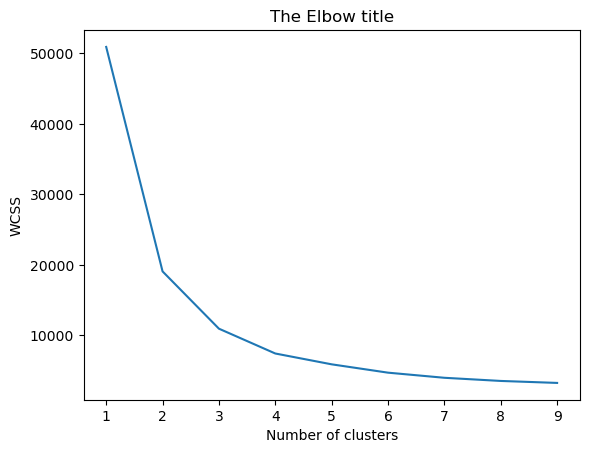

In [73]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x1)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)     
    
number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Instantiate Kmeans
km = KMeans(4,random_state=42)
predictedlabel = km.fit_predict(x1)
sampledX['cluster'] = km.labels_

acc2=(metrics.accuracy_score(predictedlabel,sampledY))*100
print("acc2", acc2)

rand_index=rand_score(predictedlabel,sampledY)
print('Rand Index:',rand_index)

adjusted_randscore_value= adjusted_rand_score(predictedlabel,sampledY)
print('adjusted_randscore_value:',adjusted_randscore_value)

adj_mutualinfo_score=metrics.adjusted_mutual_info_score(predictedlabel,sampledY)
print('adj_mutualinfo_score:', adj_mutualinfo_score)